# EDA yearly co2 emissions by country and source
data source: https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import mapclassify
import folium

In [71]:
df=pd.read_csv('GCB2022v27_MtCO2_flat.csv')
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# checking for nans
df.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [87]:
#general description of total cumulative emissions
df.groupby('Country')['Total'].sum().describe()

count    2.320000e+02
mean     1.497353e+04
std      1.186718e+05
min      1.538880e-01
25%      3.312470e+01
50%      2.774575e+02
75%      2.705192e+03
max      1.736930e+06
Name: Total, dtype: float64

## Over all top 15 emitting countries

In [5]:
# 15 top emitting countries
df[df['Country']!='Global'].groupby('Country').sum('Total').sort_values('Per Capita',ascending=False).head(15)

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Sint Maarten (Dutch part),512856,70.289267,0.000000,70.289267,0.000000,0.000000,0.000000,0.000000,11574.339869
Curaçao,512856,575.620432,0.000000,574.829024,0.791408,0.000000,0.000000,0.000000,3630.368451
Qatar,512856,2155.058694,0.000000,320.479411,1622.297397,34.225454,178.056433,0.000000,3265.913622
USA,512856,421906.855203,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
Luxembourg,512856,761.954187,358.212043,306.115555,75.217378,20.263224,0.001539,2.144447,1984.154907
United Arab Emirates,512856,5101.479458,79.674396,1412.684432,3041.273910,148.273962,419.572753,0.000000,1804.258983
Kuwait,512856,3010.456705,0.000000,1627.271301,1063.163766,31.255339,288.766299,0.000000,1717.791052
United Kingdom,512856,78508.720102,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
Belgium,512856,12644.150407,7534.478721,3437.206261,1370.319104,223.236673,3.329542,75.580100,1477.017260


In [6]:
top_emmiters_total=df[df['Country']!='Global'].groupby('Country'
                                   ).sum(['Total','Coal','Oil','Gas','Cement','Flaring','Other']
                                        ).sort_values('Total',
                                                      ascending=False
                                                     ).head(15)
top_emmiters_20yrs=df[(df['Country']!='Global')& (df['Year']>=2001)].groupby('Country'
                                   ).sum(['Total','Coal','Oil','Gas','Cement','Flaring','Other']
                                        ).sort_values('Total',
                                                      ascending=False
                                                     ).head(15)

/var/folders/7h/q333ls7x161ds8g72gtysb9wy2wccf/T/ipykernel_13755/3114237308.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top_emmiters_total.index, rotation=90);
/var/folders/7h/q333ls7x161ds8g72gtysb9wy2wccf/T/ipykernel_13755/3114237308.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(top_emmiters_20yrs.index, rotation=90);


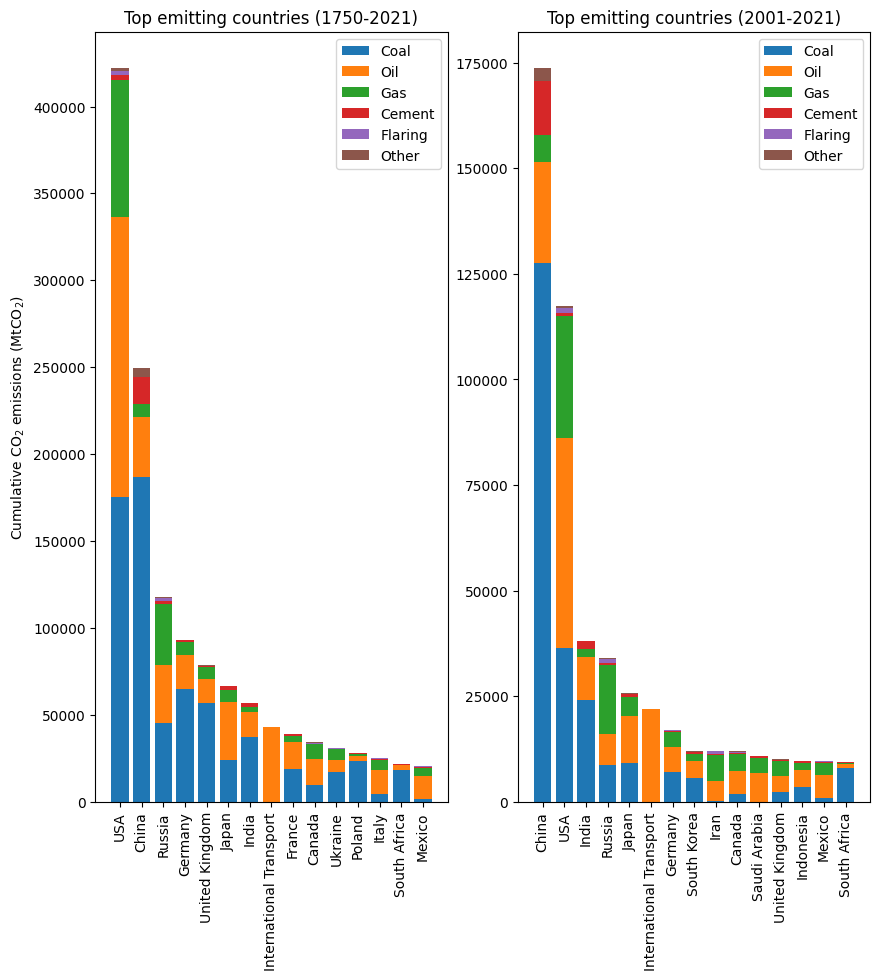

In [88]:
#Plot cumulative emissions of top emitting countries over whole dataset and past 20 years
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 10)
bottoms=0
for (columnName, columnData) in top_emmiters_total.items():
    if columnName in ['Coal','Oil','Gas','Cement','Flaring','Other']:
        ax[0].bar(top_emmiters_total.index, 
               top_emmiters_total[columnName],
               bottom=bottoms,
               label=columnName)
        bottoms=bottoms+columnData
# Display the legend
ax[0].legend()
ax[0].set_xticklabels(top_emmiters_total.index, rotation=90);
ax[0].set_title('Top emitting countries (1750-2021)')
ax[0].set_ylabel('Cumulative CO$_2$ emissions (MtCO$_2$)')

bottoms=0
for (columnName, columnData) in top_emmiters_20yrs.items():
    if columnName in ['Coal','Oil','Gas','Cement','Flaring','Other']:
        ax[1].bar(top_emmiters_20yrs.index, 
               top_emmiters_20yrs[columnName],
               bottom=bottoms,
               label=columnName)
        bottoms=bottoms+columnData
# Display the legend
ax[1].legend()
ax[1].set_xticklabels(top_emmiters_20yrs.index, rotation=90);
ax[1].set_title('Top emitting countries (2001-2021)');

In [92]:
#Create table with emission type columns in row
df_emitTypes=df.melt(['Country','ISO 3166-1 alpha-3','Year'],var_name='emissions_type',value_name='CO2_emissions')

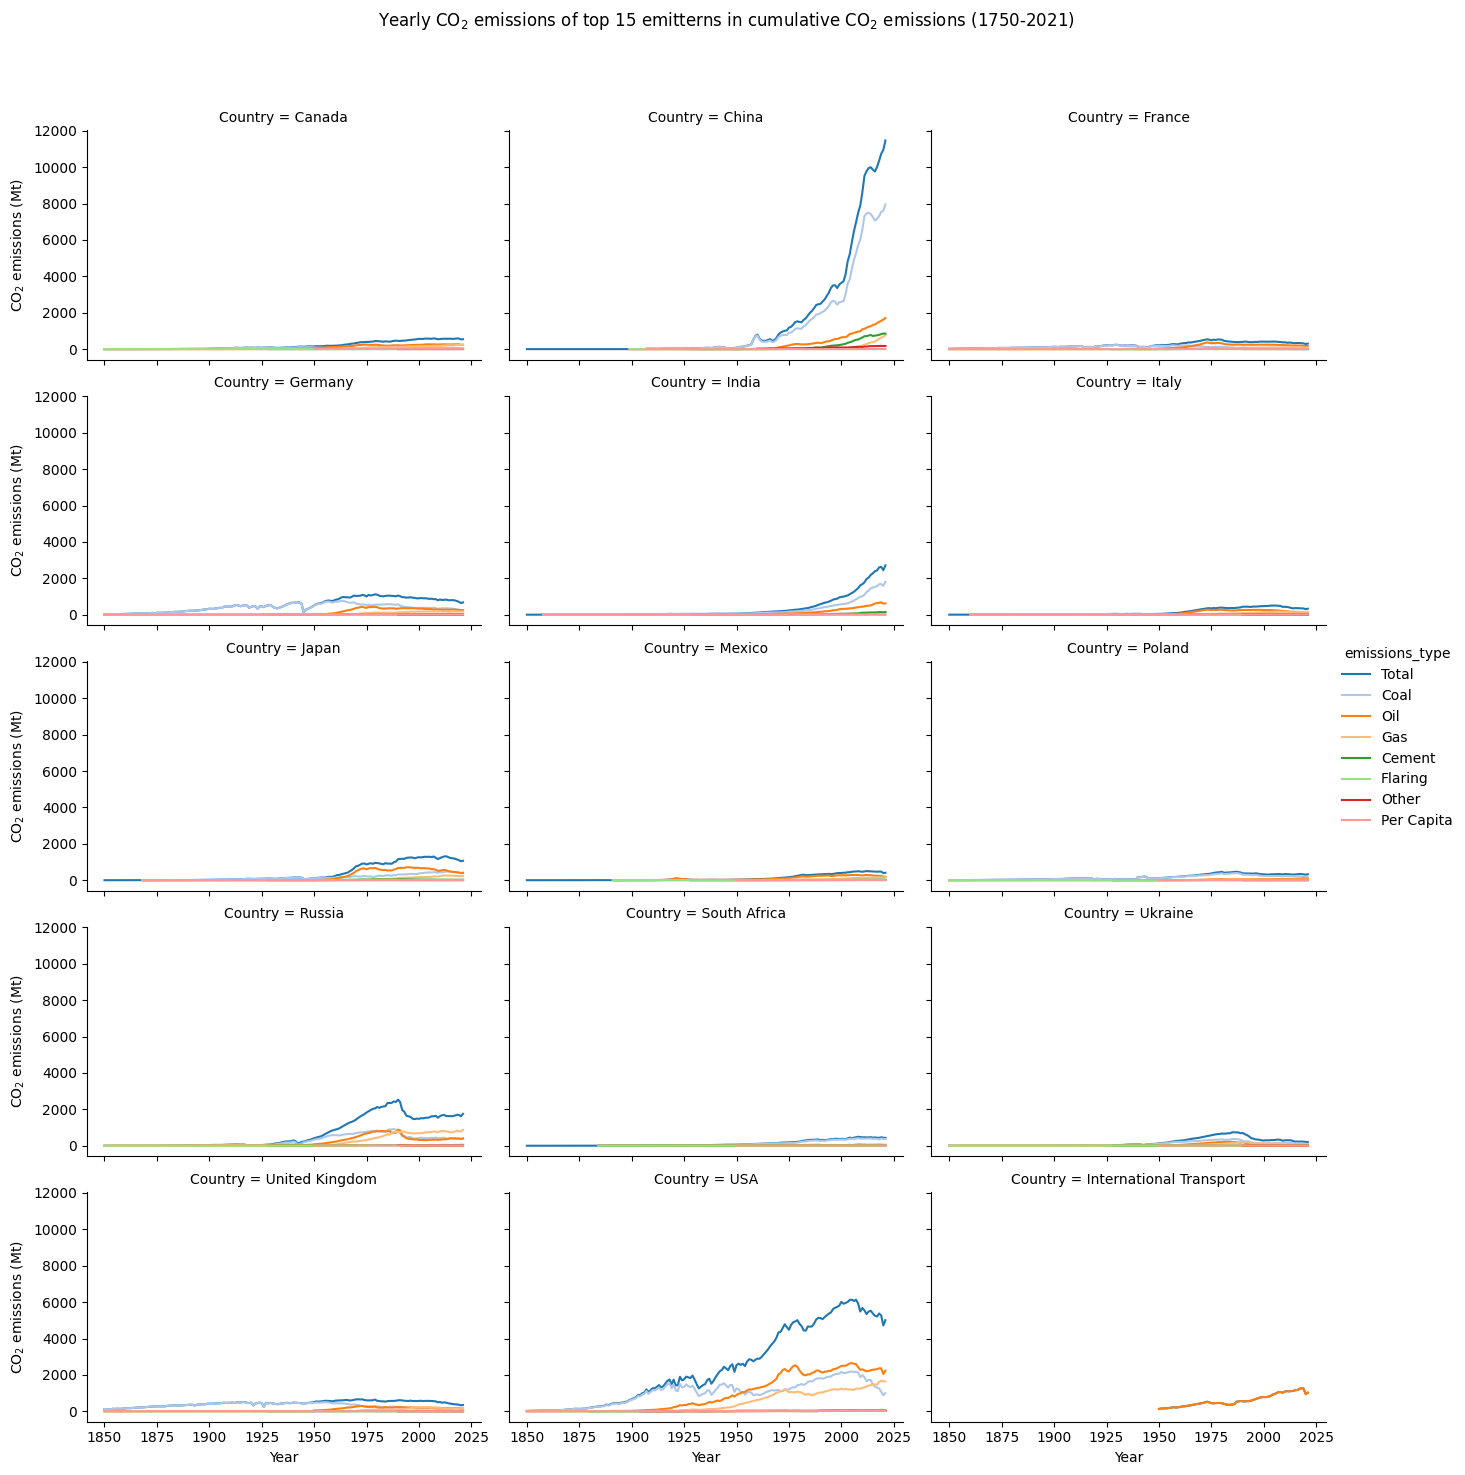

In [91]:
# Plot yearly CO2 emissions for top emitters by emission types
g=sns.relplot(x='Year',y='CO2_emissions',
            hue='emissions_type',
            col='Country', col_wrap=3,
            data=df_emitTypes[(df_emitTypes['Country'].isin(top_emmiters_total.index))&(df_emitTypes['Year']>=1850)],
           height=3, aspect=1.5,
           kind='line',
           palette='tab20')
g.fig.suptitle('Yearly CO$_2$ emissions of top 15 emitterns in cumulative CO$_2$ emissions (1750-2021)')
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels('Year','CO$_2$ emissions (Mt)');

## Top 3 emtting countries in every year

In [8]:
#calc top 3 emmiters per year
x=pd.DataFrame(table_country_total).T
length=pd.DataFrame(table_country_total).T.size
rslt = pd.DataFrame(np.zeros((0,6)), columns=['top1','top2','top3','v1','v2','v3'])
for i in x.columns:
    df1row = pd.DataFrame(x.nlargest(3, i).index.tolist(), index=['top1','top2','top3']).T
    df2row = pd.DataFrame(x.nlargest(3, i)[i].values, index=['v1','v2','v3']).T
    dummy=pd.merge(df1row,df2row, left_index=True, right_index=True)
    rslt = pd.concat([rslt, dummy], axis=0)
    #rslt = rslt.merge(df2row)
    rslt.rename(index={0:i},inplace=True)

rslt.index.names=['Year']
rslt

,top1,top2,top3,v1,v2,v3
Year,,,,,,
1750,United Kingdom,Afghanistan,Albania,9.350528,0.000000,0.000000
1751,United Kingdom,Afghanistan,Albania,9.350528,0.000000,0.000000
1752,United Kingdom,Afghanistan,Albania,9.354192,0.000000,0.000000
1753,United Kingdom,Afghanistan,Albania,9.354192,0.000000,0.000000
1754,United Kingdom,Afghanistan,Albania,9.357856,0.000000,0.000000
...,...,...,...,...,...,...
2017,China,USA,India,10011.107108,5210.957584,2434.867906
2018,China,USA,India,10353.876989,5376.657233,2600.446463
2019,China,USA,India,10740.996069,5259.143836,2626.459473


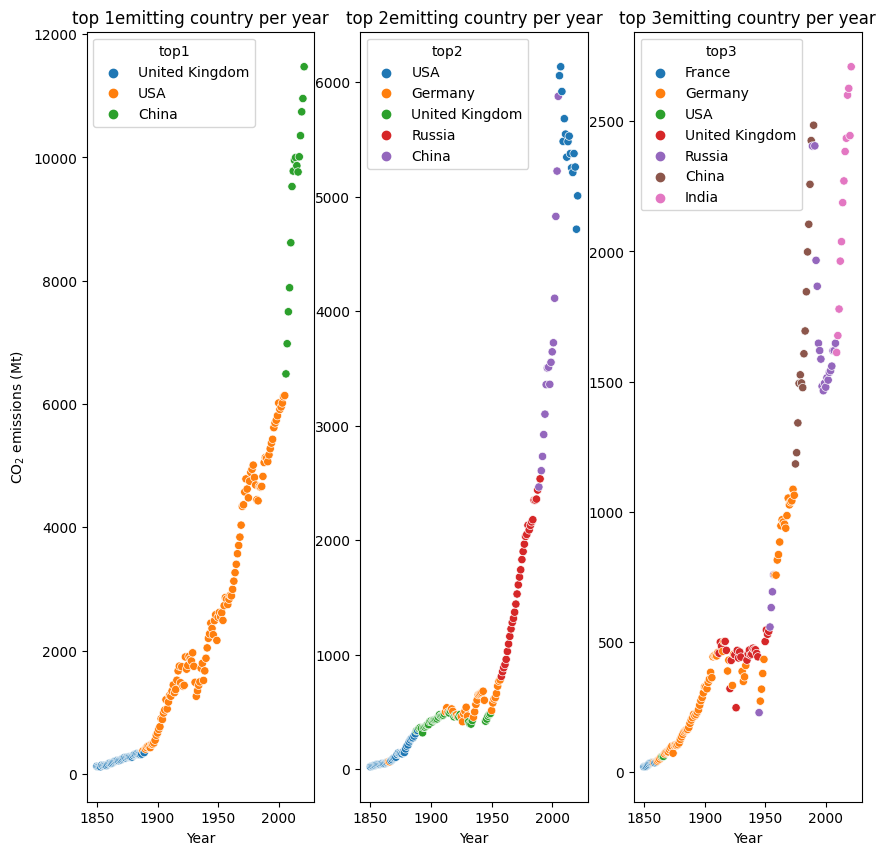

In [9]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10, 10)
for i in range(3):
    sns.scatterplot(x='Year',y='v'+str(i+1),hue='top'+str(i+1),data=rslt[rslt.index>=1850],ax=ax[i],palette='tab10')
    ax[i].set_title('top '+str(i+1)+'emitting country per year')
    ax[i].set(ylabel='')
ax[0].set(ylabel='CO$_2$ emissions (Mt)');

## Mapping emissions

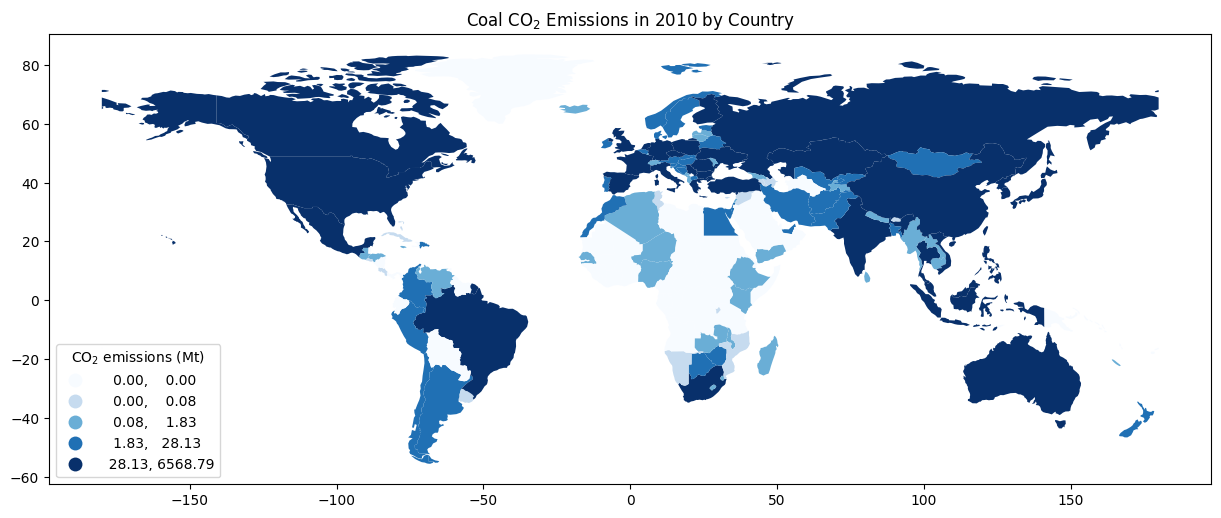

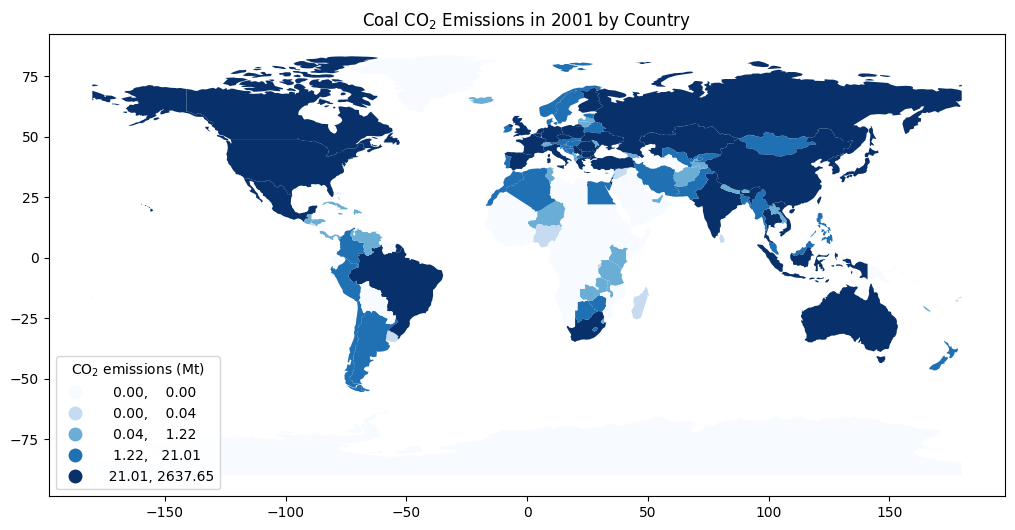

In [90]:
years=[2010,2001]
for year in years:
    year_data = df[df["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="iso_a3", right_on="ISO 3166-1 alpha-3")

    merged_data.plot(column="Coal", 
                     cmap="Blues", 
                     figsize=(15, 6), 
                     scheme="quantiles", 
                     legend=True,
                     legend_kwds={'title': "CO$_2$ emissions (Mt)",'loc': "lower left"}
                    )
    plt.title(f"Coal CO$_2$ Emissions in {year} by Country")
    #plt.show()

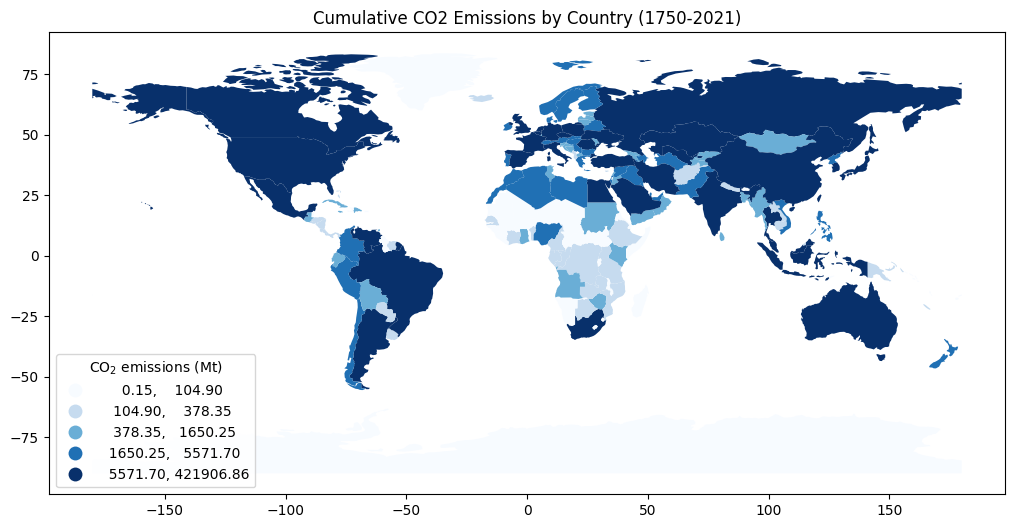

In [85]:
#create table with country location information
emissions_total=df[df['Country']!='Global'].groupby(['Country','ISO 3166-1 alpha-3']).sum('Total').sort_values('Per Capita',ascending=False)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
merged_data = world.merge(emissions_total, left_on="iso_a3", right_on="ISO 3166-1 alpha-3")

#map country emissions
merged_data.plot(column="Total", 
                 cmap="Blues",
                 figsize=(20, 6), 
                 scheme="quantiles",
                 legend=True,
                 legend_kwds={'title': "CO$_2$ emissions (Mt)",'loc': "lower left"}
                )


plt.title(f"Cumulative CO2 Emissions by Country (1750-2021)")
plt.show()

In [32]:
# Not represented countries in plot as table above was merged on country code
no_country_code=df[df['ISO 3166-1 alpha-3'].isna()]['Country'].unique()
no_country_code

array(['French Equatorial Africa', 'French West Africa',
       'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)',
       'Ryukyu Islands'], dtype=object)